#Loan Status Prediction
________
By: Ahmed Ali

##Environment set-up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


______________

##Data Wrangling
In this section, we would load our desired data from a flat csv file using pandas to further explore our data.

In [3]:
df= pd.read_csv('/content/loans.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0



##Data Cleaning
In this section, we would dive deeper into exploring our dataset and perform cleaning operations like (dropping columns, handling NaNs, converting data types). All of which would help us reach a more accurate result in answering our investigating questions.

In [18]:
def Countnulls() :
  global df
  for i in df.columns :
      if not  df[i].isna().sum()==0 :
       print(f'Column {i} has number of nulls {df[i].isna().sum()}')
  print('Counting Nulls End')

In [19]:
Countnulls()

Column Gender has number of nulls 13
Column Married has number of nulls 3
Column Dependents has number of nulls 15
Column Self_Employed has number of nulls 32
Column LoanAmount has number of nulls 22
Column Loan_Amount_Term has number of nulls 14
Column Credit_History has number of nulls 50
Counting Nulls End


In [25]:
df=df.dropna()
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [27]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,332
N,148


In [29]:
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [30]:
df.nunique()

,0
Loan_ID,480
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,405
CoapplicantIncome,232
LoanAmount,186
Loan_Amount_Term,9


In [36]:
objList = df.select_dtypes(include = "object").columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    int64  
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 52.5 KB
None


In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [38]:
df.shape

(480, 13)

In [39]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [43]:
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3,41


##Data Visualization

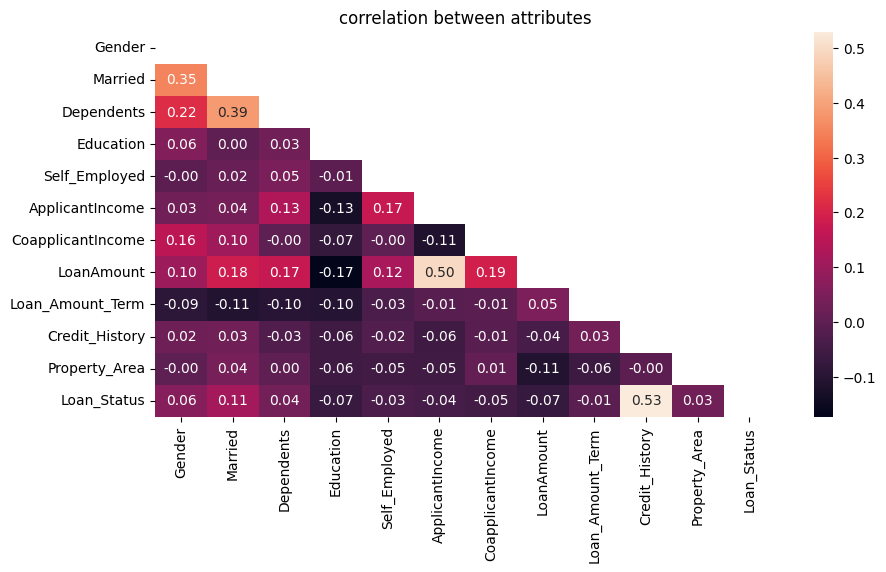

In [51]:
# plotting correlation heatmap
plt.figure(figsize=(10,5))
corr = df.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot= True, mask= mask, fmt = '.2f')
plt.title("correlation between attributes")
plt.show()

In [52]:
df_counting= df[['Gender','Dependents','Married','Education','Self_Employed']]

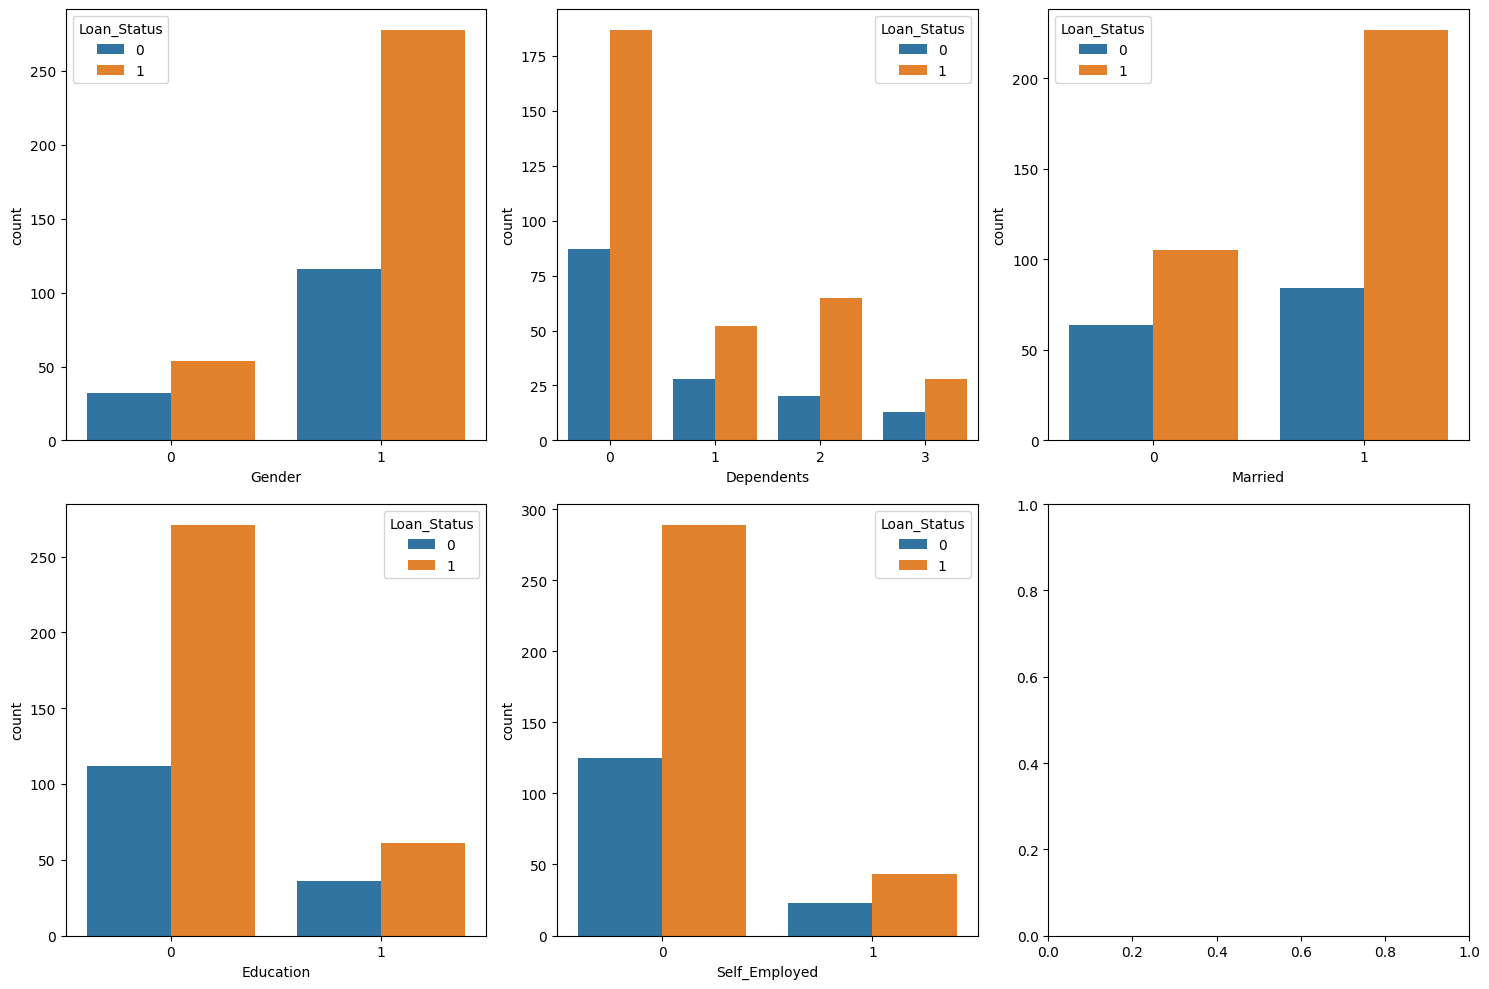

In [58]:

fig, axes = plt.subplots(2,3,figsize=(15,10))
for i,col in enumerate(df_counting.columns):
    row,col_position = divmod(i,3)
    sns.countplot(x=col, hue='Loan_Status', data=df, ax=axes[row,col_position])
    plt.tight_layout()
plt.show()


##Modeling

In [62]:
# separating the data and label
X = df.drop(columns=['Loan_Status'],axis=1)
Y = df['Loan_Status']

In [65]:
X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [67]:
# from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report

# ###########################################

# GaussianNBModel = GaussianNB()
# MultinomialNBModel = MultinomialNB(alpha=1.0)
# BernoulliNBModel = BernoulliNB(alpha=1.0,binarize=1)
# LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
# RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=300,max_depth=7,random_state=33)
# GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33)
# QDAModel = QuadraticDiscriminantAnalysis(tol=0.0001)
# SVCModel = SVC(kernel= 'rbf',max_iter=100,C=1.0,gamma='auto')
# DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33)
# KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform',algorithm='auto')

# Models = [GaussianNBModel,KNNClassifierModel,MultinomialNBModel,
#           BernoulliNBModel,LogisticRegressionModel,RandomForestClassifierModel,
#           GBCModel,QDAModel,SVCModel,DecisionTreeClassifierModel]


# ###########################################


# ModelsScore = {}
# for Model in Models :
#     print(f'for Model {str(Model).split("(")[0]}')
#     Model.fit(X_train, y_train)
#     print(f'Train Score is : {Model.score(X_train, y_train)}')
#     print(f'Test Score is : {Model.score(X_test, y_test)}')
#     y_pred = Model.predict(X_test)
#     ClassificationReport = classification_report(y_test,y_pred)
#     print('Classification Report is : \n', ClassificationReport )
#     print(f'Precision value is  : {ClassificationReport.split()[19]}')
#     print(f'Recall value is  : {ClassificationReport.split()[20]}')
#     print(f'F1 Score value is  : {ClassificationReport.split()[21]}')
#     ModelsScore[str(Model).split("(")[0]] = [ClassificationReport.split()[19],
#                                              ClassificationReport.split()[20],ClassificationReport.split()[21]]
#     print('=================================================')

for Model GaussianNB
Train Score is : 0.7916666666666666
Test Score is : 0.8333333333333334
Classification Report is : 
               precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.86      0.91      0.88        33

    accuracy                           0.83        48
   macro avg       0.81      0.79      0.80        48
weighted avg       0.83      0.83      0.83        48

Precision value is  : 0.81
Recall value is  : 0.79
F1 Score value is  : 0.80
for Model KNeighborsClassifier
Train Score is : 0.7430555555555556
Test Score is : 0.6666666666666666
Classification Report is : 
               precision    recall  f1-score   support

           0       0.44      0.27      0.33        15
           1       0.72      0.85      0.78        33

    accuracy                           0.67        48
   macro avg       0.58      0.56      0.56        48
weighted avg       0.63      0.67      0.64        48

Precision value i

In [68]:
classifier = GaussianNB()
classifier.fit(X_train,Y_train)


GaussianNB()

In [70]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7916666666666666


In [71]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


In [77]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )
print(f'Precision value is  : {ClassificationReport.split()[19]}')
print(f'Recall value is  : {ClassificationReport.split()[20]}')
print(f'F1 Score value is  : {ClassificationReport.split()[21]}')
ModelsScore[str(Model).split("(")[0]] = [ClassificationReport.split()[19],ClassificationReport.split()[20],ClassificationReport.split()[21]]

Classification Report is : 
               precision    recall  f1-score   support

           0       0.75      0.40      0.52        15
           1       0.78      0.94      0.85        33

    accuracy                           0.77        48
   macro avg       0.76      0.67      0.69        48
weighted avg       0.77      0.77      0.75        48

Precision value is  : 0.76
Recall value is  : 0.67
F1 Score value is  : 0.69


_________